In [1]:
# Import required libraries
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation

2023-05-27 15:49:11.179346: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the dataset
df = pd.read_csv('../dataset/set_01_new.csv', encoding='utf-8').dropna()
df.columns = ['label', 'data']

X = df['data']
y = df['label']

In [6]:
# Split the dataset into training and validating sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=7)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.66, random_state=7)

# Feature extration
vectorizer = HashingVectorizer(stop_words='english', n_features=5000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_val = vectorizer.transform(X_val).toarray()
X_test = vectorizer.transform(X_test).toarray()

X_train.shape[1]

5000

In [7]:
# Build the Neural Network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                320064    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 320,129
Trainable params: 320,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
56/56 [==============================] - 2s 17ms/step - loss: 0.5954 - accuracy: 0.8480 - val_loss: 0.4717 - val_accuracy: 0.8935
Epoch 2/20
56/56 [==============================] - 0s 6ms/step - loss: 0.3503 - accuracy: 0.9359 - val_loss: 0.2653 - val_accuracy: 0.9671
Epoch 3/20
56/56 [==============================] - 0s 6ms/step - loss: 0.1832 - accuracy: 0.9836 - val_loss: 0.1619 - val_accuracy: 0.9764
Epoch 4/20
56/56 [=====

In [8]:
import matplotlib.pyplot as plt

# Helper function for plot graph
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.figure()

85/85 [==============================] - 0s 5ms/step - loss: 0.0679 - accuracy: 0.9768
Test accuracy: 0.9768041372299194


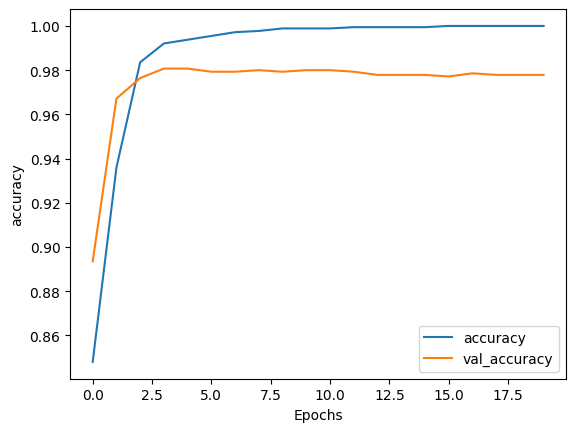

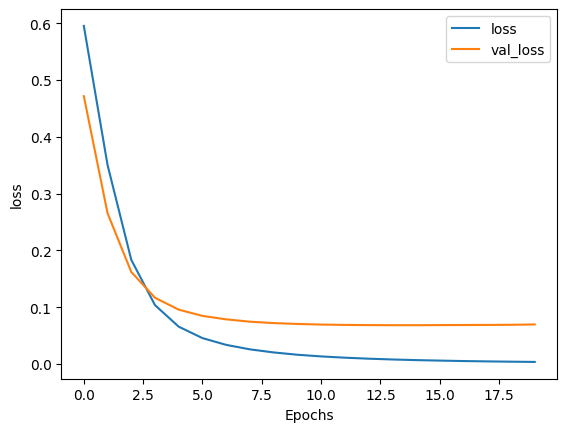

<Figure size 640x480 with 0 Axes>

In [9]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [53]:
# Test the performance of the model
def spamDetection(message):
    vectorizer = HashingVectorizer(stop_words='english', n_features=5000)
    inputMsg = vectorizer.fit_transform([message]).toarray()
    return model.predict(inputMsg)

print(spamDetection("hey let grab lunch tgt next week shall we"))
print(spamDetection("important email account has been hacked attention require click link to reset password"))

1/1 [==============================] - 0s 152ms/step
[[3.445649e-05]]
1/1 [==============================] - 0s 26ms/step
[[0.07315801]]
